<a href="https://colab.research.google.com/github/DmitriiDenisov/mlcourse_dubai/blob/master/jupyter_notebooks/Lecture_04_Linear_Regression/topic4_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <center>Topic 4. Linear Regression
## <center> Part 1. Ordinary Least Squares


## Article outline
1. [Recap](#1.-Recap)
2. [Introduction](#2.-Introduction)
3. [Maximum Likelihood Estimation](#3.-Maximum-Likelihood-Estimation)
4. [Bias-Variance Decomposition](#4.-Bias-Variance-Decomposition)
5. [Regularization of Linear Regression](#5.-Regularization-of-Linear-Regression)
6. [Practice](#6.Practice)
7. [Practice.Lasso Regression](#7.Practice.Lasso-Regression)
8. [Practice.Ridge Regression](#8.Practice.Ridge-Regression)
9. [References](#9.-References)
10. [Demo assignment](#10.-Demo-assignment)
11. [Useful resources](#11.-Useful-resources)


## 1. Recap

### 1.1 Dimentions:
<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/dimentions.gif?raw=1">

### 1.2 Derivative:
<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/derivative_1.gif?raw=1">

<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/corona_1.png?raw=1" width="800"/>
<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/corona_2.png?raw=1" width="800"/>

### 1.3 How to find min/max of a function?
With the help of derivative!

<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/min_max.png?raw=1" width="800"/>


### 1.4 Maximum Likelyhood Estimation (MLE)
Maximum likelihood estimation is a method that determines values for the parameters of a model. The parameter values are found such that they maximise the likelihood that the process described by the model produced the data that were actually observed.

It seems reasonable that a good estimate of the unknown parameter $\theta$ would be the value of $\theta$ that maximizes the probability of getting the data we observed. (So, do you see from where the name "maximum likelihood" comes?) So, that is, in a nutshell, the idea behind the method of maximum likelihood estimation. 

But how would we implement the method in practice? Well, suppose we have a random sample $X_1, X_2,..., X_n$ for which the probability density (or mass) function of each $X_i$ is $f(x_i; \theta)$. Then, the joint probability mass (or density) function of $X_1, X_2,..., X_n$, which we'll (not so arbitrarily) call $L(\theta)$ is:

$$\Large L(\theta)=P(X_1=x_1,X_2=x_2,…,X_n=x_n)=f(x_1; \theta) \cdot f(x_2;\theta)... \cdot f(x_n; \theta)= \prod_{i=1}^{\infty}  f(x_i; \theta)$$
 
**Example**:
Many people probably remember the formula of ethyl alcohol, so I decided to do an experiment to determine whether people remember a simpler formula for methanol: $CH_3OH$. We surveyed 400 people to find that only 117 people remembered the formula. Then, it is reasonable to assume that the probability that the next respondent knows the formula of methyl alcohol is $\frac{117}{400} \approx 29\%$. Let's show that this intuitive assessment is not only good but also a maximum likelihood estimate. Where this estimate come from? Recall the definition of the Bernoulli distribution: a random variable has a <a href="https://en.wikipedia.org/wiki/Bernoulli_distribution">Bernoulli distribution</a> if it takes only two values ($1$ and $0$ with probability $\theta$ and $1 - \theta$, respectively) and has the following probability distribution function:

$$\Large p\left(\theta, x\right) = \theta^x \left(1 - \theta\right)^\left(1 - x\right), x \in \left\{0, 1\right\}$$

This distribution is exactly what we need, and the distribution parameter $\theta$ is the estimate of the probability that a person knows the formula of methyl alcohol. In our $400$ *independent* experiments, let's denote their outcomes as $\textbf{x} = \left(x_1, x_2, \ldots, x_{400}\right)$. Let's write down the likelihood of our data (observations), i.e. the probability of observing exactly these 117 realizations of the random variable $x = 1$ and 283 realizations of $x = 0$:

$$\Large p(\textbf{x}; \theta) = \prod_{i=1}^{400} \theta^{x_i} \left(1 - \theta\right)^{\left(1 - x_i\right)} = \theta^{117} \left(1 - \theta\right)^{283}$$

Next, we will maximize the expression with respect to $\theta$. Most often this is not done with the likelihood $p(\textbf{x}; \theta)$ but with its logarithm (the monotonic transformation does not change the solution but simplifies calculation greatly):

$$\Large \log p(\textbf{x}; \theta) = \log \prod_{i=1}^{400} \theta^{x_i} \left(1 - \theta\right)^{\left(1 - x_i\right)} = $$
$$ \large = \log \theta^{117} \left(1 - \theta\right)^{283} =  117 \log \theta + 283 \log \left(1 - \theta\right)$$

Now, we want to find such a value of $\theta$ that will maximize the likelihood. For this purpose, we'll take the derivative with respect to $\theta$, set it to zero, and solve the resulting equation:

$$\Large  \frac{\partial \log p(\textbf{x}; \theta)}{\partial \theta} = \frac{\partial}{\partial \theta} \left(117 \log \theta + 283 \log \left(1 - \theta\right)\right) = \frac{117}{\theta} - \frac{283}{1 - \theta};$$

Now let's find such $\theta$ that the equation above is equal to zero:

$$ \Large \frac{117}{\theta} - \frac{283}{1 - \theta} = 0 \Leftrightarrow  \frac{117}{\theta} = \frac{283}{1 - \theta} \Leftrightarrow 117(1-\theta) = 283 \theta \Leftrightarrow \theta = \frac{117}{400}$$


It turns out that our intuitive assessment is exactly the maximum likelihood estimate. Now let us apply the same reasoning to the linear regression problem and try to find out what lies beyond the mean squared error. To do this, we'll need to look at linear regression from a probabilistic perspective. 
 

### 1.5 What is Expected value and Variance?
Definition of expected value: 

$$\large E[X] = \sum_{i=0}^N x_i \cdot p(x_i) $$

Another informal way to think of the expectation of a random variable is to notice that it gives a measure of the center of the associated distribution.

$$\large Var[X] = E[(X-E[X])^2] = \sum_{i=0}^N (x_i-E[X])^2 \cdot p(x_i) $$
In other words Variance is a measurement of the spread between numbers in a data set

#### Example-1, fair coint: 
Suppose we play a game: I flip a coin and if it is Heads then I pay you 10\\$ and if it is Tails then I pay you 100\\$

| 10 \$ (Heads) | 100 \$ (Tails) |
| --- | --- |
| 0.5 | 0.5 |

Then $E[X] = 0.5 \cdot 10 + 0.5 \cdot 100 = 55\$ $

$Var[X] = (10-55)^2 \cdot 0.5 + (100-55)^2 \cdot 0.5 = 2025\$ $

#### Example-2, unfair coint: 

| 10 \$ (Heads) | 100 \$ (Tails) |
| --- | --- |
| 0.9 | 0.1 |

Then $E[X] = 0.9 \cdot 10 + 0.1 \cdot 100 = 19\$ $

$Var[X] = (10-19)^2 \cdot 0.9 + (100-19)^2 \cdot 0.1 = 729 \$ $

#### Properties of Expected Value and Variance:
$$\Large E[c] = c$$

 $$\Large E[X+Y] = E[X] + E[Y]$$

 $$\Large E[cX] = cE[X]$$

 $$\Large Var[X] = E[X^2] - E[X]^2$$

## 2. Introduction 
We will start studying linear models with linear regression. First of all, you must specify a model that relates the dependent variable $y$ to the explanatory factors (or features); for linear models, the dependency function will take the following form: $\large y = w_0 + \sum_{i=1}^m w_i x_i$, where $m$ is the number of features. If we add a fictitious dimension $x_0 = 1$ (called _bias_ or _intercept_ term) for each observation, then the linear form can be rewritten in a slightly more compact way by pulling the absolute term $w_0$ into the sum: $\large y = \sum_{i=0}^m w_i x_i = \textbf{w}^\text{T} \textbf{x}$. If we have a matrix of $n$ observations, where the rows are observations from a data set, we need to add a single column of ones on the left. We define the model as follows:

$$\large \textbf y = \textbf X \textbf w + \epsilon,$$

where

- $\textbf w \in \mathbb{R}^{m+1}$ – is a $(m+1) \times 1$ column-vector of the model parameters (in machine learning, these parameters are often referred to as *weights*);
- $\textbf X \in \mathbb{R}^{n \times (m+1)}$ – is a $n \times (m+1)$ matrix of observations and their features, (including the fictitious column on the left) with full column [rank](https://en.wikipedia.org/wiki/Rank_(linear_algebra)):  $\text{rank}\left(\textbf X\right) = m + 1 $;
- $\epsilon \in \mathbb{R}^n$ – is a $n \times 1$ random column-vector, referred to as *error* or *noise*;
- $\textbf y \in \mathbb{R}^n$ – is a $n \times 1$ column-vector - the dependent (or *target*) variable.

We can also write this expression out for each observation

$$\large y_i = \sum_{j=0}^m w_j X_{ij} + \epsilon_i$$

Will apply the following restrictions to the set of random errors $\epsilon_i$ (see [Gauss-Markov](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) theorem for deeper statistical motivation):

- expectation of all random errors is zero:  $\forall i: \mathbb{E}\left[\epsilon_i\right] = 0 $;
- all random errors have the same finite variance, this property is called <a href="https://en.wikipedia.org/wiki/Homoscedasticity">homoscedasticity</a>:  $\forall i: \text{Var}\left(\epsilon_i\right) = \sigma^2 < \infty $;
- random errors are uncorrelated:  $\forall i \neq j: \text{Cov}\left(\epsilon_i, \epsilon_j\right) = 0 $.

**Disclaimer:** at this point, it's time to say that we don't plan to squeeze a whole statistics course into one article, so we try to provide the general idea of the math behind OLS.

<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/LR_1.jpg?raw=1" width="800"/>
<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/LR_2.png?raw=1" width="800"/>
<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/LR_5.png?raw=1" width="800"/>

But how are we going to build this line/plane?

<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/LR_3.png?raw=1" width="800"/>

One of the ways to calculate those weights is with the ordinary least squares method (OLS), which minimizes the mean squared error between the actual value of the dependent variable and the predicted value given by the model:

$$ \Large \begin{array}{rcl} MSE = \mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \textbf{w}^\text{T} \textbf{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \textbf{y} - \textbf X \textbf{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\textbf{y} - \textbf X \textbf{w}\right)^\text{T} \left(\textbf{y} - \textbf X \textbf{w}\right)
\end{array}$$


Where $\left\| x \right\|_2$ <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm">Eucledian Norm of vector</a> x


Interaction for OLS: https://seeing-theory.brown.edu/regression-analysis/index.html

 
### What is training? 

When we do
```python
from sklearn.tree import DecisionTreeClassifier 
DecisionTreeClassifier().fit(X_train, y_train)
```
then we are building a Decision Tree, i.e solving an optimization problem

When we do
```python
from sklearn.linear_model import LinearRegression
LinearRegression().fit(X_train, y_train)
```
then we are looking for coefficients $w_0, w_1, ..., w_m$, i.e solving an optimization problem

When you train deep Neural Network which will detect faces of people on streets you are solving an optimization problem

### Conclusion: training = solving an optimization problem


To solve this optimization problem, we need to calculate derivatives with respect to the model parameters. We set them to zero and solve the resulting equation for $\textbf w$ (matrix differentiation may seem difficult; try to do it in terms of sums to be sure of the answer).


<br>
<details>
<summary>Small CheatSheet on matrix derivatives (click the triangle to extend)</summary>
<p>
$$\large \begin{array}{rcl} 
\frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} &=& \textbf{A} \\
\frac{\partial}{\partial \textbf{X}} \textbf{X}^{\text{T}} \textbf{A} \textbf{X} &=& \left(\textbf{A} + \textbf{A}^{\text{T}}\right)\textbf{X} \\
\frac{\partial}{\partial \textbf{A}} \textbf{X}^{\text{T}} \textbf{A} \textbf{y} &=&  \textbf{X}^{\text{T}} \textbf{y}\\
\frac{\partial}{\partial \textbf{X}} \textbf{A}^{-1} &=& -\textbf{A}^{-1} \frac{\partial \textbf{A}}{\partial \textbf{X}} \textbf{A}^{-1} 
\end{array}$$
</p>
</details>


What we get is:

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} &=& \frac{\partial}{\partial \textbf{w}} \frac{1}{2n} \left( \textbf{y}^{\text{T}} \textbf{y} -2\textbf{y}^{\text{T}} \textbf{X} \textbf{w} + \textbf{w}^{\text{T}} \textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) \\
&=& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right)
\end{array}$$

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) = 0 \\
&\Leftrightarrow& -\textbf{X}^{\text{T}} \textbf{y} + \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = 0 \\
&\Leftrightarrow& \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = \textbf{X}^{\text{T}} \textbf{y} \\
&\Leftrightarrow& \textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$

Bearing in mind all the definitions and conditions described above, we can say that, based on the <a href="https://en.wikipedia.org/wiki/Gauss–Markov_theorem">Gauss–Markov theorem</a>, OLS estimators of the model parameters are optimal among all linear and unbiased estimators, i.e. they give the lowest variance.

## 3. Maximum Likelihood Estimation

One could ask why we choose to minimize the mean square error instead of something else? After all, one can minimize the mean absolute value of the residual. The only thing that will happen, if we change the minimized value, is that we will exceed the Gauss-Markov theorem conditions, and our estimates will therefore cease to be the optimal over the linear and unbiased ones.

Our model naturally remains the same:

$$\Large \textbf y = \textbf X \textbf w + \epsilon,$$

but let us now assume that the random errors follow a centered [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) (beware, it's an additional assumption, it's not a prerequisite of a Gauss-Markov theorem):

<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/Galton_Board.gif?raw=1" width="800"/>

$$\Large \epsilon_i \sim \mathcal{N}\left(0, \sigma^2\right)$$

Let's rewrite the model from a new perspective:

$$\Large \begin{array}{rcl} 
y_i &=& \sum_{j=1}^m w_j X_{ij} + \epsilon_i \\
&\sim& \sum_{j=1}^m w_j X_{ij} + \mathcal{N}\left(0, \sigma^2\right) \\
p\left(y_i \mid \textbf X; \textbf{w}\right) &=& \mathcal{N}\left(\sum_{j=1}^m w_j X_{ij}, \sigma^2\right)
\end{array}$$

Since the examples are taken independently (uncorrelated errors is one of the conditions of the Gauss-Markov theorem), the full likelihood of the data will look like a product of the density functions $p\left(y_i\right)$. Let's consider the log-likelihood, which allows us to switch products to sums:

$$\Large \begin{array}{rcl} 
\log p\left(\textbf{y}\mid \textbf X; \textbf{w}\right) &=& \log \prod_{i=1}^n \mathcal{N}\left(\sum_{j=1}^m w_j X_{ij}, \sigma^2\right) \\
&=& \sum_{i=1}^n \log \mathcal{N}\left(\sum_{j=1}^m w_j X_{ij}, \sigma^2\right) \\
&=& -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^\text{T} \textbf{x}_i\right)^2
\end{array}$$

We want to find the maximum likelihood hypothesis i.e. we need to maximize the expression $p\left(\textbf{y} \mid \textbf X; \textbf{w}\right)$ to get $\textbf{w}_{\text{ML}}$, which is the same as maximizing its logarithm. Note that, while maximizing the function over some parameter, you can throw away all the members that do not depend on this parameter:

$$\Large \begin{array}{rcl} 
\textbf{w}_{\text{ML}} &=& \arg \max_{\textbf w} p\left(\textbf{y}\mid \textbf X; \textbf{w}\right) = \arg \max_{\textbf w} \log p\left(\textbf{y}\mid \textbf X; \textbf{w}\right)\\
&=& \arg \max_{\textbf w} -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=& \arg \max_{\textbf w} -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \textbf{w}^{\text{T}} \textbf{x}_i\right)^2 \\
&=&  \arg \min_{\textbf w} \mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right)
\end{array}$$

Thus, we have seen that the maximization of the likelihood of data is the same as the minimization of the mean squared error (given the above assumptions). It turns out that such a cost function is a consequence of the fact that the errors are distributed normally.


## 4. Bias-Variance Decomposition

Let's talk a little about the error properties of linear regression prediction (in fact, this discussion is valid for all machine learning algorithms). We just covered the following:

- true value of the target variable is the sum of a deterministic function $f\left(\textbf{x}\right)$ and random error $\epsilon$: $y = f\left(\textbf{x}\right) + \epsilon$;
- error is normally distributed with zero mean and some variance: $\epsilon \sim \mathcal{N}\left(0, \sigma^2\right)$;
- true value of the target variable is also normally distributed: $y \sim \mathcal{N}\left(f\left(\textbf{x}\right), \sigma^2\right)$;
- we try to approximate a deterministic but unknown function $f\left(\textbf{x}\right)$ using a linear function of the covariates $\widehat{f}\left(\textbf{x}\right)$, which, in turn, is a point estimate of the function $f$ in function space (specifically, the family of linear functions that we have limited our space to), i.e. a random variable that has mean and variance.

So, the error at the point $\textbf{x}$ decomposes as follows:

$$\Large \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\left(\widehat{f}\left(\textbf{x}\right)\right)^2\right] - 2\mathbb{E}\left[y\widehat{f}\left(\textbf{x}\right)\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\widehat{f}^2\right] - 2\mathbb{E}\left[y\widehat{f}\right] \\
\end{array}$$

For clarity, we will omit the notation of the argument of the functions. Let's consider each member separately. The first two are easily decomposed according to the formula $\text{Var}\left(z\right) = \mathbb{E}\left[z^2\right] - \mathbb{E}\left[z\right]^2$:

$$\Large \begin{array}{rcl} 
\mathbb{E}\left[y^2\right] &=& \text{Var}\left(y\right) + \mathbb{E}\left[y\right]^2 = \sigma^2 + f^2\\
\mathbb{E}\left[\widehat{f}^2\right] &=& \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 \\
\end{array}$$



<br>
<details>
<summary>Explanation for $Var(y)$ and $E[y]$</summary>
<p>
    

$$\Large \begin{array}{rcl} 
\text{Var}\left(y\right) &=& \text{Var}(f+\epsilon) = \text{Var}(f) + \text{Var}(\epsilon) = 0 + \sigma^2 = \sigma^2
\end{array}$$

$$\Large \mathbb{E}[y] = \mathbb{E}[f + \epsilon] = \mathbb{E}[f] + \mathbb{E}[\epsilon] = f + 0 = f$$
</p>
</details>

And finally, we get to the last term in the sum. Recall that the error and the target variable are independent of each other:

$$\Large \begin{array}{rcl} 
\mathbb{E}\left[y\widehat{f}\right] &=& \mathbb{E}\left[\left(f + \epsilon\right)\widehat{f}\right] \\
&=& \mathbb{E}\left[f\widehat{f}\right] + \mathbb{E}\left[\epsilon\widehat{f}\right] \\
&=& f\mathbb{E}\left[\widehat{f}\right] + \mathbb{E}\left[\epsilon\right] \mathbb{E}\left[\widehat{f}\right]  = f\mathbb{E}\left[\widehat{f}\right]
\end{array}$$

Finally, let's bring this all together:

$$\Large \begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \sigma^2 + f^2 + \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 - 2f\mathbb{E}\left[\widehat{f}\right] \\
&=& \left(f - \mathbb{E}\left[\widehat{f}\right]\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2 \\
&=& \text{Bias}\left(\widehat{f}\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2
\end{array}$$

With that, we have reached our ultimate goal -- the last formula tells us that the forecast error of any model of type $y = f\left(\textbf{x}\right) + \epsilon$ is composed of:

- squared bias: $\text{Bias}\left(\widehat{f}\right)$ is the average error for all sets of data;
- variance: $\text{Var}\left(\widehat{f}\right)$ is error variability, or by how much error will vary if we train the model on different sets of data;
- irremovable error: $\sigma^2$.

While we cannot do anything with the $\sigma^2$ term, we can influence the first two. Ideally, we'd like to negate both of these terms (upper left square of the picture), but, in practice, it is often necessary to balance between the biased and unstable estimates (high variance).

<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/bvtf.png?raw=1" width="480">

Generally, as the model becomes more computational (e.g. when the number of free parameters grows), the variance (dispersion) of the estimate also increases, but bias decreases. Due to the fact that the training set is memorized completely instead of generalizing, small changes lead to unexpected results (overfitting). On the other side, if the model is too weak, it will not be able to learn the pattern, resulting in learning something different that is offset with respect to the right solution.

<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/biasvariance.png?raw=1" width="480">

The Gauss-Markov theorem asserts that the OLS estimator of parameters of the linear model is the best for the class of linear unbiased estimator. This means that if there exists any other unbiased model $g$, from the same class of linear models, we can be sure that $Var\left(\widehat{f}\right) \leq Var\left(g\right)$.

## 5. Regularization of Linear Regression 

There are situations where we might intentionally increase the bias of the model for the sake of stability i.e. to reduce the variance of the model $\text{Var}\left(\widehat{f}\right)$. One of the conditions of the Gauss-Markov theorem is the full column rank of matrix $\textbf{X}$. Otherwise, the OLS solution $\textbf{w} = \left(\textbf{X}^\text{T} \textbf{X}\right)^{-1} \textbf{X}^\text{T} \textbf{y}$ does not exist since the inverse matrix $\left(\textbf{X}^\text{T} \textbf{X}\right)^{-1}$ does not exist. In other words, matrix $\textbf{X}^\text{T} \textbf{X}$ will be singular or degenerate. This problem is called an <a href="https://en.wikipedia.org/wiki/Well-posed_problem"> ill-posed problem</a>. Problems like this must be corrected, namely, matrix $\textbf{X}^\text{T} \textbf{X}$ needs to become non-degenerate, or regular (which is why this process is called regularization). Often we observe the so-called multicollinearity in the data: when two or more features are strongly correlated, it is manifested in the matrix $\textbf{X}$ in the form of "almost" linear dependence between the columns. For example, in the problem of predicting house prices by their parameters, attributes "area with balcony" and "area without balcony" will have an "almost" linear relationship. Formally, matrix $\textbf{X}^\text{T} \textbf{X}$ for such data is reversible, but, due to multicollinearity, some of its eigenvalues will be close to zero. In the inverse matrix $\textbf{X}^\text{T} \textbf{X}$, some extremely large eigenvalues will appear, as eigenvalues of the inverse matrix are $\frac{1}{\lambda_i}$. The result of this vacillation of eigenvalues is an unstable estimate of model parameters, i.e. adding a new set of observations to the training data will lead to a completely different solution. 
One method of regularization is <a href="https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261#f810">L2 regularization</a> (and the regression is Rigde Regression), which generally looks like the addition of a new member to the mean squared error:

$$\Large \begin{array}{rcl} 
\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 + \lambda \left\| \textbf{w}\right\|^2_2\\
\end{array}$$ where $$ \left\| \textbf{w} \right\|^2_2 = w_1^2+w_2^2+...w_n^2$$

In this case, the problem of minimizing the mean squared error becomes a problem with a restriction on the $L_2$ norm. If we differentiate the new cost function with respect to the model parameters, set the resulting function to zero, and rearrange for  $\textbf{w}$, we get the exact solution of the problem.

$$\Large \begin{array}{rcl} 
\textbf{w} &=& \left(\textbf{X}^{\text{T}} \textbf{X} + \lambda \textbf{E}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}$$

This type of regression is called ridge regression. The ridge is the diagonal matrix that we add to the $\textbf{X}^\text{T} \textbf{X}$ matrix to ensure that we get a regular matrix as a result.

<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/ridge.png?raw=1">

Such a solution reduces dispersion but becomes biased because the norm of the vector of parameters is also minimized, which makes the solution shift towards zero. On the figure below, the OLS solution is at the intersection of the white dotted lines. Blue dots represent different solutions of ridge regression. It can be seen that by increasing the regularization parameter $\lambda$, we shift the solution towards zero.


<img src="https://github.com/DmitriiDenisov/mlcourse_dubai/blob/master/img/l2.png?raw=1">


Also another famous technique for regularization is L1 regularization and Lasso Regression:
$$\Large \begin{array}{rcl} 
\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 + \lambda \left\| \textbf{w}\right\|^2_1\\
\end{array}$$ where $$ \left\| \textbf{w} \right\|_1 = |w_1|+|w_2|+...|w_n|$$


## 6.Practice

In [12]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns; sns.set() # just to use the seaborn theme


from sklearn.datasets import load_boston
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold

**We will work with Boston house prices data (UCI repository). Download the data.**

In [6]:
boston = load_boston()
X, y = boston['data'], boston['target']

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
pd.DataFrame(y)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [10]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## 7.Practice.Lasso Regression

Lasso regression minimizes mean squared error with L1 regularization:
$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$$

where $y = w^Tx$ hyperplane equation depending on model parameters $w$, $\ell$ is number of observations in data $X$, $d$ is number of features, $y$ target values, $\alpha$ regularization coefficient.

**Let's fit Lasso Regression with the small $\alpha$ coefficient (weak regularization). Coefficient related to NOX feature (nitric oxides concentration) will be zero. It means that this feature is the least important for median house prices prediction in this region.**

In [13]:
lasso = Lasso(alpha=0.1)
lasso.fit(X,y)
lasso.coef_

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

In [0]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

**Let's train Lasso Regression with $\alpha=10$. All of the coefficients are equal to zero except features ZN (proportion of residential land zoned for lots over 25,000 sq.ft.), TAX (full-value property-tax rate), B (proportion of blacks by town) and LSTAT (% of lower status of the population).**

In [14]:
lasso = Lasso(alpha=10)
lasso.fit(X,y)
lasso.coef_

array([-0.        ,  0.02614602, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00928242,
       -0.        ,  0.00749584, -0.56403807])

**It means that Lasso Regression may serve as a feature selection method.**

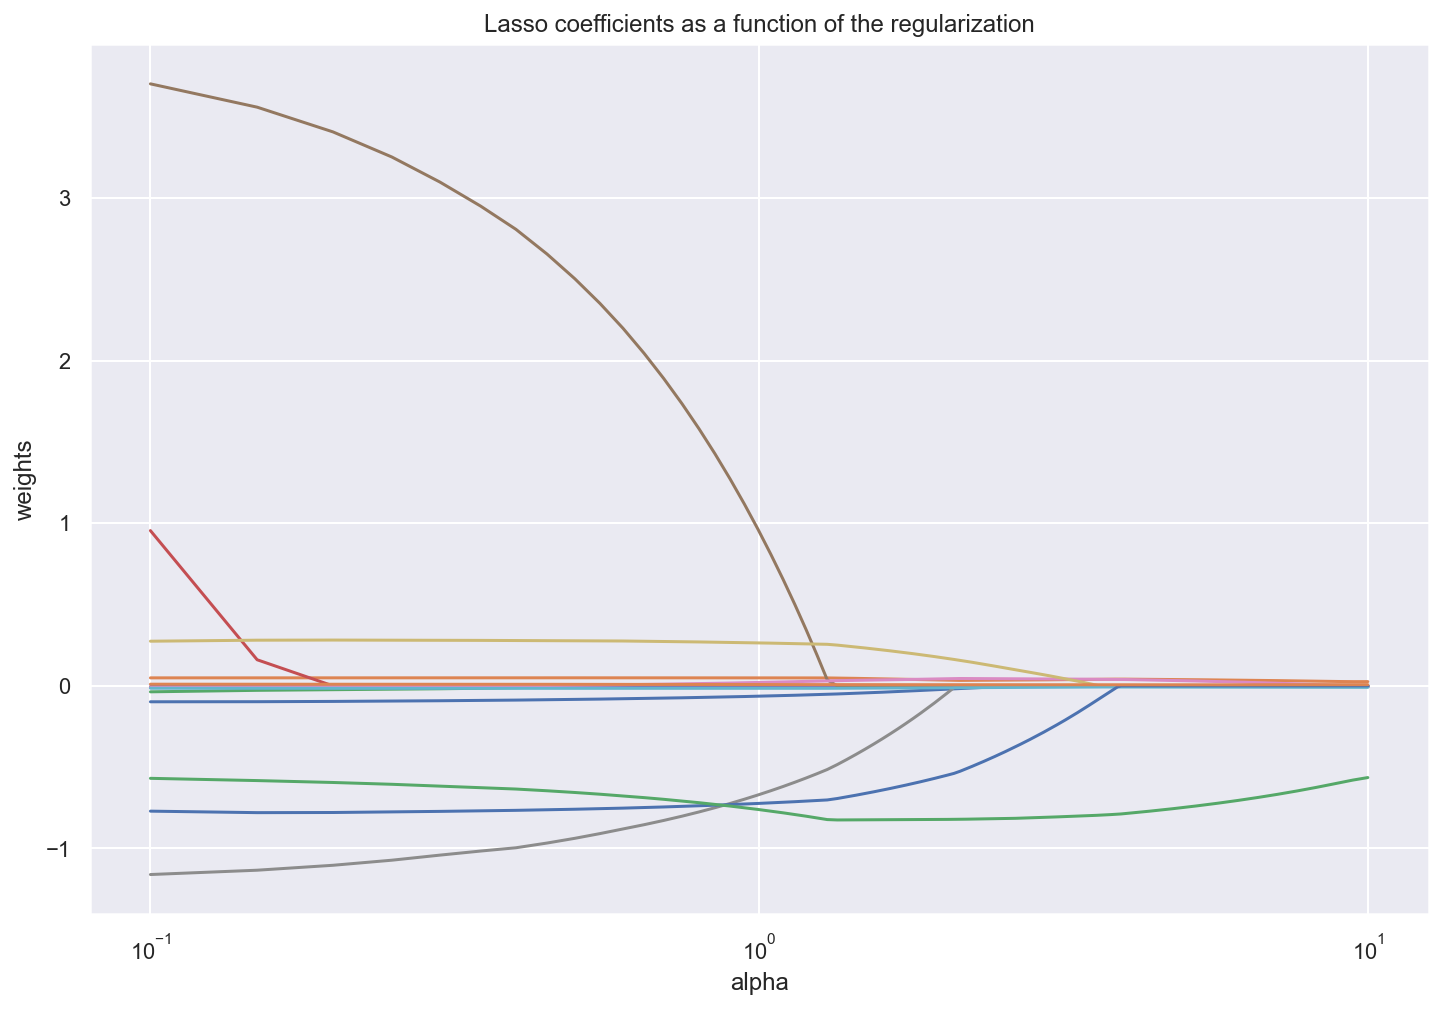

In [15]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

plt.rcParams['figure.figsize'] = (12, 8)

ax = plt.gca()
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show();

**Now let's find the best value of $\alpha$ during cross-validation.**

In [16]:
# alphas

In [17]:
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, 
                   random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
        verbose=False)

In [19]:
lasso_cv.coef_

array([-0.09739888,  0.04946381, -0.02749478,  0.16060406, -0.        ,
        3.55971374, -0.00726968, -1.13393157,  0.28096773, -0.01503453,
       -0.77985441,  0.01025033, -0.58259584])

In [20]:
lasso_cv.alpha_

0.14974874371859298

In [0]:
#abs(cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=3, 
#                        scoring='neg_mean_squared_error').mean())

## 8.Practice.Ridge Regression

Ridge regression minimizes mean squared error with L2 regularization:
$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d w_i^2$$

where $y = w^Tx$ hyperplane equation depending on model parameters $w$, $\ell$ is number of observations in data $X$, $d$ is number of features, $y$ target values, $\alpha$ regularization coefficient.

There is a special class [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) for Ridge regression cross-validation.

In [21]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

In [22]:
ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [23]:
ridge_cv.alpha_

264.30814869741084

In [0]:
#abs(cross_val_score(Ridge(ridge_cv.alpha_), X, y, cv=3, 
#                        scoring='neg_mean_squared_error').mean())

In [0]:
#abs(cross_val_score(Ridge(270), X, y, cv=3, 
#                        scoring='neg_mean_squared_error').mean())

**In case of Ridge Regression neither of the parameters are reducing to zero. It can be small value but non-zero.**

In [24]:
ridge_cv.coef_

array([-0.09975818,  0.05562804, -0.05006572,  0.30202744, -0.09151777,
        1.42295311,  0.01289136, -0.99866364,  0.33080392, -0.01661515,
       -0.81984784,  0.00876309, -0.72318342])

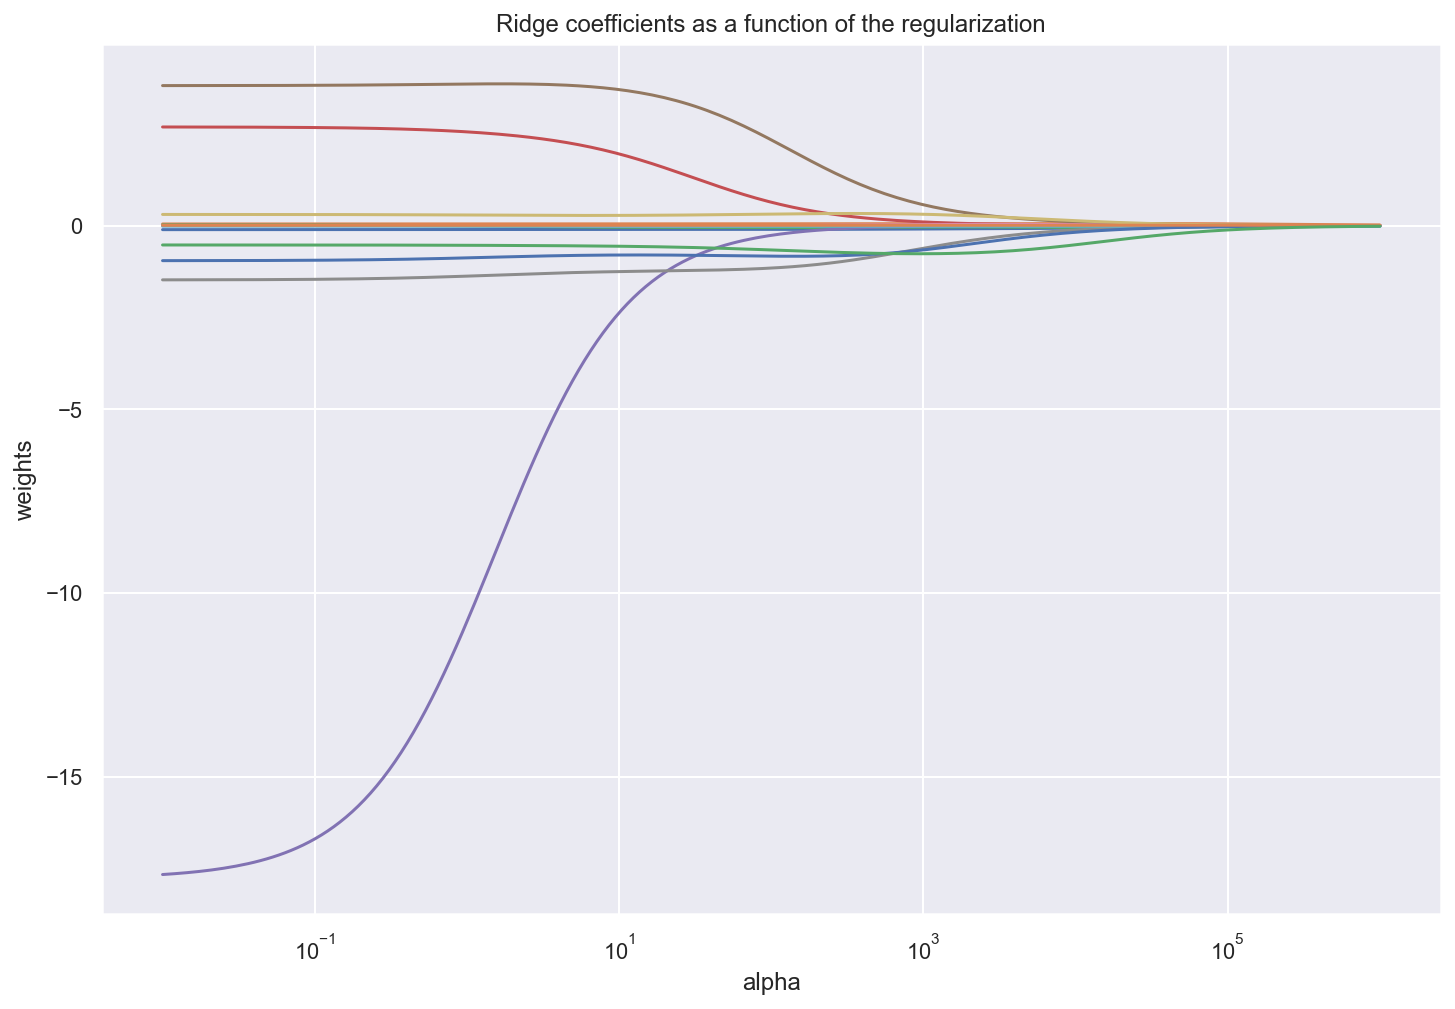

In [25]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
model = Ridge()

coefs = []
for a in ridge_alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
ax = plt.gca()
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [32]:
regr = Ridge(100000000)
regr.fit(X, y)
regr.coef_

array([-1.39333559e-04,  3.66277587e-04, -1.38867649e-04,  2.03778014e-06,
       -2.05651587e-06,  2.20609342e-05, -4.47184760e-04,  2.08741899e-05,
       -1.30267771e-04, -3.16070375e-03, -4.80593626e-05,  1.24966837e-03,
       -2.32180205e-04])

## 9. References
- [Generalized linear models](http://scikit-learn.org/stable/modules/linear_model.html) (Generalized Linear Models, GLM) in Scikit-learn
- [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV), [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) in Scikit-learn

## 10. Demo assignment
To practice with linear models, you can complete [this assignment](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit) where you'll build a sarcasm detection model. The assignment is just for you to practice, and goes with [solution](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit-solution).

## 11. Useful resources
- Medium ["story"](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-4-linear-classification-and-regression-44a41b9b5220) based on this notebook
- mlcourse.ai [site](https://mlcourse.ai), [course repo](https://github.com/Yorko/mlcourse.ai), and YouTube [channel](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX)
- Course materials as a [Kaggle Dataset](https://www.kaggle.com/kashnitsky/mlcourse)
- If you read Russian: an [article](https://habrahabr.ru/company/ods/blog/323890/) on Habrahabr with ~ the same material. And a [lecture](https://youtu.be/oTXGQ-_oqvI) on YouTube
- A nice and concise overview of linear models is given in the book ["Deep Learning"](http://www.deeplearningbook.org) (I. Goodfellow, Y. Bengio, and A. Courville).
- Linear models are covered practically in every ML book. We recommend "Pattern Recognition and Machine Learning" (C. Bishop) and "Machine Learning: A Probabilistic Perspective" (K. Murphy).
- If you prefer a thorough overview of linear model from a statistician's viewpoint, then look at "The elements of statistical learning" (T. Hastie, R. Tibshirani, and J. Friedman).
- The book "Machine Learning in Action" (P. Harrington) will walk you through implementations of classic ML algorithms in pure Python.
- [Scikit-learn](http://scikit-learn.org/stable/documentation.html) library. These guys work hard on writing really clear documentation.
- Scipy 2017 [scikit-learn tutorial](https://github.com/amueller/scipy-2017-sklearn) by Alex Gramfort and Andreas Mueller.
- One more [ML course](https://github.com/diefimov/MTH594_MachineLearning) with very good materials.
- [Implementations](https://github.com/rushter/MLAlgorithms) of many ML algorithms. Search for linear regression and logistic regression.